# Intro

In [1]:
# Imports
%matplotlib inline
from manage_data import load_data, get_all_landmarks_from_images, compute_error
from menpowidgets import visualize_images
from menpofit.aam import HolisticAAM, LucasKanadeAAMFitter

In [2]:
training_set, test_set = load_data('~/datasets/ibug/300W/combined', 0.1)
#test_set_landmarks =  get_all_landmarks_from_images(test_set)

In [3]:
aam = HolisticAAM(training_set, verbose=True, diagonal=400, scales=(0.5, 1))

- Computing reference shape                                                     Computing batch 0
- Building modelsges size: [==========] 100% (420/420) - done.                  
  - Scale 0: Building shape model                                               

/home/ben/miniconda2/envs/Sec4_ModelDefinition/lib/python2.7/site-packages/menpofit/builder.py:338: MenpoFitModelBuilderWarning: The reference shape passed is not a TriMesh or subclass and therefore the reference frame (mask) will be calculated via a Delaunay triangulation. This may cause small triangles and thus suboptimal warps.
  MenpoFitModelBuilderWarning)


  - Scale 0: Doneding appearance model                                          
  - Scale 1: Doneding appearance model                                          
                                                              

In [41]:
type(aam.reference_shape)

menpo.shape.pointcloud.PointCloud

In [4]:
fitter = LucasKanadeAAMFitter(aam, n_shape=0.98, n_appearance=0.98)

In [48]:
from menpofit.fitter import noisy_shape_from_bounding_box

fitting_results = []

for i in test_set:
    # obtain original landmarks
    gt_s = i.landmarks['PTS'].lms
    
    # generate perturbed landmarks
    s = noisy_shape_from_bounding_box(gt_s, gt_s.bounding_box())
    
    # fit image
    fr = fitter.fit_from_shape(i, s, gt_shape=gt_s) 
    fitting_results.append(fr)
    
    print(fr)
    break



Fitting result of 68 landmark points.
Initial error: 0.0510
Final error: 0.0474


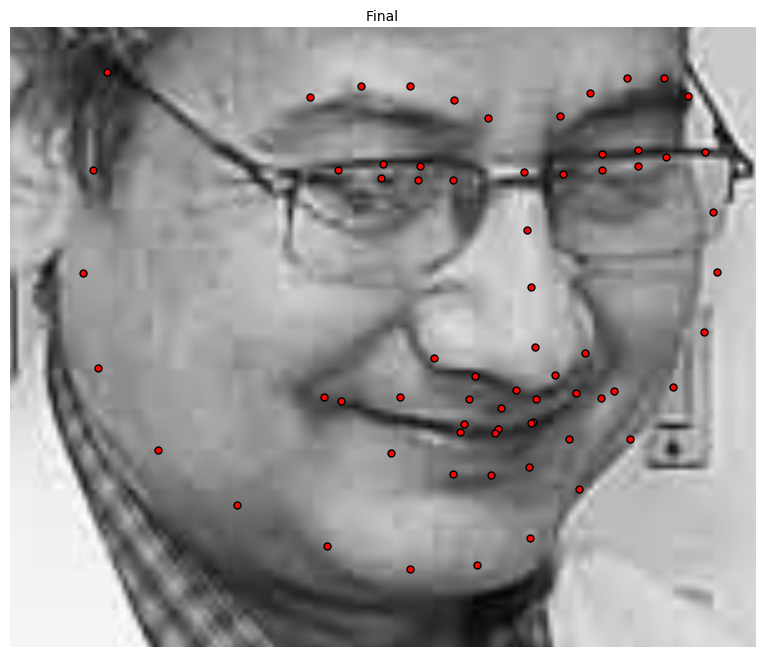

In [49]:
from menpowidgets import visualize_fitting_result

visualize_fitting_result(fitting_results)



In [31]:

from scipy.spatial.distance import euclidean as norm
from scipy.spatial.distance import cdist
import numpy as np

image_error = []

for pred in fitting_results:

    truth = pred.gt_shape.points
    pred = pred.final_shape.points

    inter_ocular_dist = norm(truth[37], truth[46])
    err = np.sum(cdist(pred,truth))
    err /= (pred.shape[0] * inter_ocular_dist)
    image_error.append(err)
    
print(image_error)

[65.28099097219156, 67.362118441934484, 67.277664960741319, 63.892598945525847, 74.073269104336035, 93.410644044044886, 57.63200318975548, 69.74397245948974, 59.963680878185656, 60.840720296797741, 65.466491472513553, 59.902009235986363, 72.547324391685322, 62.661321481688574, 61.450744266729103, 69.947053515365326, 65.141649244752927, 52.012458347145795, 70.087878379470283, 66.29371227128506, 58.970088820107229, 54.997383618487888, 65.106182880173478, 63.571629493097433, 70.62413668099768, 75.075599909229297, 64.582399081478599, 63.436140698566732, 67.690364774222004, 69.642435666597578, 65.451055957542565, 62.949416260768501, 62.649298368348028, 62.424990881262005, 65.49103044540206, 57.072387878138571, 62.332144260449063, 60.662491575698311, 64.86985580670013, 69.028177218124156, 50.377500481411801, 62.695718598705767, 64.036837031620507, 58.887846916954466, 61.802683801881102, 63.099827932814705, 77.581862705257137, 66.037084280497893, 71.200724869485654, 71.214151388569533, 61.669

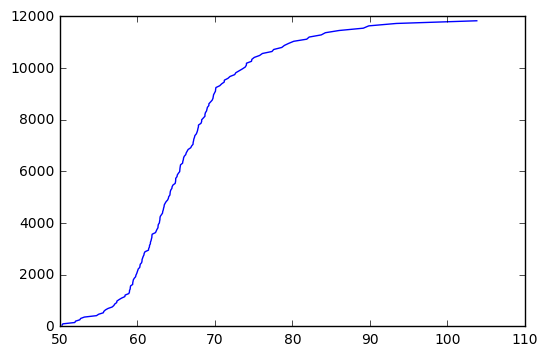

In [38]:
image_error = np.sort(image_error)
cumsum = np.cumsum(image_error)
plt.plot(image_error, cumsum)